Exploration notebook for Kaggle's mastercard default challenge

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
FILE_PATH = 'C:/Users/Nick/Desktop/Nick/Projects/Kaggle/Amex_default_competition/amex-default-prediction/train_data.csv'
df_train = pd.read_csv(FILE_PATH, nrows=100000)
# Upload train dataframe

In [28]:
print(df_train)

                                             customer_ID         S_2  \
0      0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-03-09   
1      0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-04-07   
2      0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-05-28   
3      0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-06-13   
4      0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-07-16   
...                                                  ...         ...   
99995  049dd5e7b5a6895c4f8b179362d8e91f26ebf0b6c95e99...  2018-01-02   
99996  049dd5e7b5a6895c4f8b179362d8e91f26ebf0b6c95e99...  2018-02-27   
99997  049dd5e7b5a6895c4f8b179362d8e91f26ebf0b6c95e99...  2018-03-08   
99998  049e0948e285ec6767bf07e6e3f5e0919821ee200e359d...  2017-03-29   
99999  049e0948e285ec6767bf07e6e3f5e0919821ee200e359d...  2017-04-28   

            P_2      D_39       B_1       B_2       R_1       S_3      D_41  \
0      0.938469  0.001733  0.008724  1.006838  0.009228 

General categories:

D_* = Delinquency variables
S_* = Spend variables
P_* = Payment variables
B_* = Balance variables
R_* = Risk variables
with the following features being categorical:

['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

In [3]:
FILE_PATH2 = 'C:/Users/Nick/Desktop/Nick/Projects/Kaggle/Amex_default_competition/amex-default-prediction/train_labels.csv'
df_labels = pd.read_csv(FILE_PATH2, nrows=100000)
# Upload train dataframe

In [4]:
print(df_labels)

                                             customer_ID  target
0      0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...       0
1      00000fd6641609c6ece5454664794f0340ad84dddce9a2...       0
2      00001b22f846c82c51f6e3958ccd81970162bae8b007e8...       0
3      000041bdba6ecadd89a52d11886e8eaaec9325906c9723...       0
4      00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...       0
...                                                  ...     ...
99995  379c691f591070e27fbc48af22b7d1c5a3aaed252513f8...       0
99996  379cd985e084f4a891f2dd8ef293bed05a19171ed0cc13...       0
99997  379ceebf8834f6272f58b71aa7124c1114e768940a7d04...       0
99998  379d1091601a628432bf15d688db67273a2332a787dc61...       0
99999  379d176c2533b3ea64aa0ee4ed20d5f53adf1d2bf80610...       0

[100000 rows x 2 columns]


In [5]:
df_tr = pd.merge(df_labels, df_train, on='customer_ID', how='left')
# Join train with its labels

In [6]:
print(df_tr)

                                              customer_ID  target         S_2  \
0       0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...       0  2017-03-09   
1       0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...       0  2017-04-07   
2       0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...       0  2017-05-28   
3       0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...       0  2017-06-13   
4       0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...       0  2017-07-16   
...                                                   ...     ...         ...   
191701  379c691f591070e27fbc48af22b7d1c5a3aaed252513f8...       0         NaN   
191702  379cd985e084f4a891f2dd8ef293bed05a19171ed0cc13...       0         NaN   
191703  379ceebf8834f6272f58b71aa7124c1114e768940a7d04...       0         NaN   
191704  379d1091601a628432bf15d688db67273a2332a787dc61...       0         NaN   
191705  379d176c2533b3ea64aa0ee4ed20d5f53adf1d2bf80610...       0         NaN   

             P_2      D_39 

# Data exploration

Questions:
- Distribution of target per customer
- Distribution of NAs in variables
- Variables distributions (hist, range etc)
- Variables correlation

In [22]:
df_cust = df_tr.groupby('customer_ID').size().reset_index(name='count')
df_cust2 = pd.merge(df_cust, df_labels, on='customer_ID', how='left')
print(df_cust2)

                                             customer_ID  count  target
0      0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...     13       0
1      00000fd6641609c6ece5454664794f0340ad84dddce9a2...     13       0
2      00001b22f846c82c51f6e3958ccd81970162bae8b007e8...     13       0
3      000041bdba6ecadd89a52d11886e8eaaec9325906c9723...     13       0
4      00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...     13       0
...                                                  ...    ...     ...
99995  379c691f591070e27fbc48af22b7d1c5a3aaed252513f8...      1       0
99996  379cd985e084f4a891f2dd8ef293bed05a19171ed0cc13...      1       0
99997  379ceebf8834f6272f58b71aa7124c1114e768940a7d04...      1       0
99998  379d1091601a628432bf15d688db67273a2332a787dc61...      1       0
99999  379d176c2533b3ea64aa0ee4ed20d5f53adf1d2bf80610...      1       0

[100000 rows x 3 columns]


In [27]:
df_cust2['frequent_customer'] = (df_cust2['count'] > 0).astype(int)
# I create a dummy indicating whether the customer appeared more than once or not

                                             customer_ID  count  target  \
0      0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...     13       0   
1      00000fd6641609c6ece5454664794f0340ad84dddce9a2...     13       0   
2      00001b22f846c82c51f6e3958ccd81970162bae8b007e8...     13       0   
3      000041bdba6ecadd89a52d11886e8eaaec9325906c9723...     13       0   
4      00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...     13       0   
...                                                  ...    ...     ...   
99995  379c691f591070e27fbc48af22b7d1c5a3aaed252513f8...      1       0   
99996  379cd985e084f4a891f2dd8ef293bed05a19171ed0cc13...      1       0   
99997  379ceebf8834f6272f58b71aa7124c1114e768940a7d04...      1       0   
99998  379d1091601a628432bf15d688db67273a2332a787dc61...      1       0   
99999  379d176c2533b3ea64aa0ee4ed20d5f53adf1d2bf80610...      1       0   

       frequent_customer  
0                      1  
1                      1  
2                 

(array([73959.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 26041.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <BarContainer object of 50 artists>)

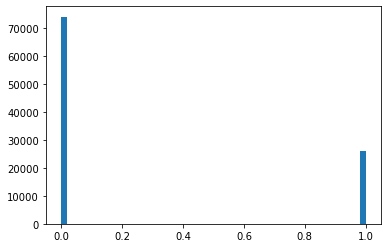

In [12]:
plt.hist(df_labels[['target']], bins=50)
# OK, slight unbalance in the 1 target. Might consider sampling adjustment

In [ ]:
plt.hist(df_cust2[['count']], bins=50)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');
# OK, most of customers have few observations. Only a small sample have a lot

In [ ]:
df_cust3 = df_cust2.set_index('target')
df_cust3.plot(kind='bar')

# Modeling 

- Logit model (as a reference)
- SVM
- Random forest (comparison)
- Ensemble models

Models comparison:
- accuracy
- sensitivity / recall
Discuss the ideal target with Fanelli - Subsampling?